In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL', 'yahoo' , start , end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434927
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546385
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434927
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546385
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [5]:
df = df.drop(['Date', 'Adj Close'] , axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


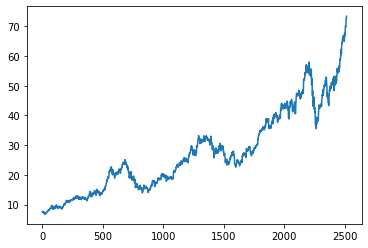

In [7]:
plt.plot(df.Close)

In [8]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

In [60]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

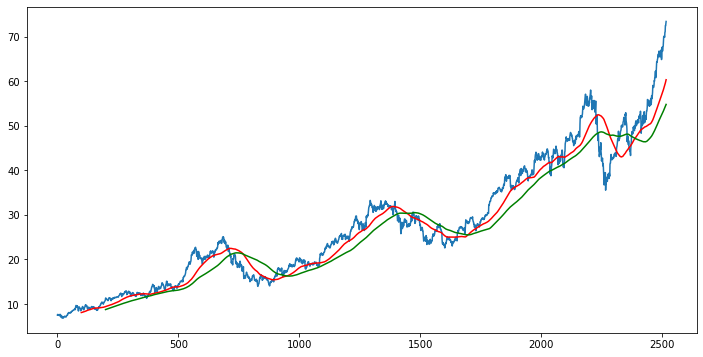

In [61]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [62]:
df.shape

(2517, 5)

In [63]:
#splitting the data in training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [64]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [67]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i , 0])

x_train , y_train = np.array(x_train) , np.array(y_train)

In [68]:
#machine learning model
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [31]:
model = Sequential()
model.add(LSTM(units  = 50 , activation = 'relu' , return_sequences= True, input_shape = (x_train.shape[1] , 1)))
model.add(Dropout(0.2))

model.add(LSTM(units  = 60, activation = 'relu' , return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units  = 80, activation = 'relu' , return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units  = 120 ,activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_3 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_4 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_5 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_9 (LSTM)               (None, 120)              

In [34]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train , y_train , epochs=50)

Epoch 1/50
52/52 [==============================] - 29s 408ms/step - loss: 0.0696
Epoch 2/50
52/52 [==============================] - 22s 427ms/step - loss: 0.0128
Epoch 3/50
52/52 [==============================] - 22s 421ms/step - loss: 0.0117
Epoch 4/50
52/52 [==============================] - 22s 423ms/step - loss: 0.0101
Epoch 5/50
52/52 [==============================] - 22s 419ms/step - loss: 0.0109
Epoch 6/50
52/52 [==============================] - 21s 411ms/step - loss: 0.0092
Epoch 7/50
52/52 [==============================] - 21s 412ms/step - loss: 0.0086
Epoch 8/50
52/52 [==============================] - 19s 374ms/step - loss: 0.0091
Epoch 9/50
52/52 [==============================] - 22s 415ms/step - loss: 0.0079
Epoch 10/50
52/52 [==============================] - 22s 422ms/step - loss: 0.0072
Epoch 11/50
52/52 [==============================] - 23s 437ms/step - loss: 0.0072
Epoch 12/50
52/52 [==============================] - 23s 434ms/step - loss: 0.0068
Epoch 13/50
5

In [35]:
model.save('Keras_model.h5')

In [36]:
past_100_days = data_training.tail(100)

In [37]:
final_df = past_100_days.append(data_testing , ignore_index = True)

In [38]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [40]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [42]:
input_data.shape

(856, 1)

In [69]:
x_test = []
y_test = []
for i in range (100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])
    


In [70]:
x_test , y_test = np.array(x_test) , np.array(y_test)

In [71]:
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [72]:
#prediction
y_predicted = model.predict(x_test)

24/24 [==============================] - 3s 128ms/step


In [74]:
y_predicted.shape

(756, 1)

In [75]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [76]:
y_predicted

array([[0.15336266],
       [0.15423214],
       [0.15495029],
       [0.15549493],
       [0.15586166],
       [0.15606254],
       [0.15613697],
       [0.15615049],
       [0.15617304],
       [0.15626301],
       [0.156459  ],
       [0.15676817],
       [0.15718612],
       [0.157707  ],
       [0.15831172],
       [0.1589737 ],
       [0.15966639],
       [0.16036269],
       [0.16105601],
       [0.16176167],
       [0.16248967],
       [0.16323778],
       [0.16398937],
       [0.16480927],
       [0.16582017],
       [0.16707538],
       [0.1686561 ],
       [0.17061377],
       [0.17296842],
       [0.17566349],
       [0.1785952 ],
       [0.18174696],
       [0.18509784],
       [0.1886272 ],
       [0.19229977],
       [0.19606668],
       [0.19987887],
       [0.20368907],
       [0.20744307],
       [0.21108525],
       [0.2145651 ],
       [0.21784136],
       [0.220909  ],
       [0.22377016],
       [0.22643042],
       [0.22888756],
       [0.23114508],
       [0.233

In [77]:
scaler.scale_

array([0.0378916])

In [78]:
scale_factor = 1/0.02099517
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor
y_test

array([ 3.40000177,  3.17250083,  3.2550013 ,  3.22250007,  3.37000108,
        3.69500186,  3.96500043,  3.99500112,  4.15500098,  4.03000097,
        3.9775012 ,  4.21750098,  4.21500045,  4.16250068,  4.21750098,
        4.23750144,  4.21000129,  4.68750033,  4.70250163,  4.70500026,
        4.62500033,  4.55500063,  6.40500114,  6.35000083,  6.4875016 ,
        6.78999949,  7.10000088,  7.22749952,  7.32250075,  7.24749998,
        7.53999954,  7.97250232,  8.09499988,  8.05500278,  8.14750157,
        8.39250052,  8.49500144,  8.35000097,  8.38250219,  8.44999945,
        8.46500266,  9.16499965,  8.957503  ,  9.16250103,  9.05250041,
        9.0975024 ,  8.96750132,  8.88749948,  9.00250117,  9.01750056,
        8.96500269,  9.33250302,  9.39000196,  9.21500271,  9.58250304,
        9.17750042,  9.5725009 ,  9.4475009 ,  9.3775012 ,  9.43750257,
       10.16750217, 10.24750019, 10.19999957, 10.13250232, 10.14250064,
       10.41000249, 10.22250248, 10.13250232, 10.05250048, 10.01

<function matplotlib.pyplot.show(close=None, block=None)>

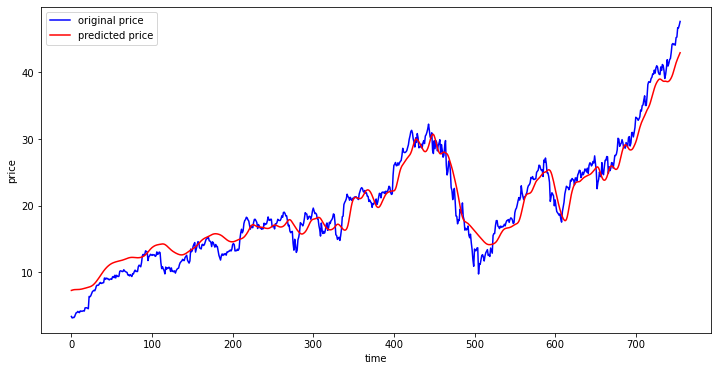

In [80]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label = 'original price')
plt.plot(y_predicted , 'r' , label = 'predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show

In [81]:
pip install streamlit



  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=637e61a5755446efdd5555d9d1b46d56232125cad5a9e91cec1db5e566e413e9
  Stored in directory: c:\users\piyush\appdata\local\pip\cache\wheels\50\93\f8\4f0a42a03a06626d675f13907b6982ad5ecff383530af5a900
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19583 sha256=03272cd09c34d1e0af175e1506235d87901f62703f7e0090752d68bc6c26c9c2
  Stored in directory: c:\users\piyush\appdata\local\pip\cache\wheels\2d\f0\a8\1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built blinker validators
